Loading necessary libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn.preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Linear Data

In this example we'll be using the Boston Housing dataset. There are 506 rows in the dataset. The target variable is median home price. There are 13 predictor variables including average number of rooms per dwelling, crime rate by town, etc. More information about this dataset can be found at https://www.kaggle.com/c/boston-housing



This data frame contains the following columns:

**crim**
per capita crime rate by town.

**zn**
proportion of residential land zoned for lots over 25,000 sq.ft.

**indus**
proportion of non-retail business acres per town.

**chas**
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

**nox**
nitrogen oxides concentration (parts per 10 million).

**rm**
average number of rooms per dwelling.

**age**
proportion of owner-occupied units built prior to 1940.

**dis**
weighted mean of distances to five Boston employment centres.

**rad**
index of accessibility to radial highways.

**tax**
full-value property-tax rate per $10,000.

**ptratio**
pupil-teacher ratio by town.

**black**
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

**lstat**
lower status of the population (percent).

**medv**
median value of owner-occupied homes in $1000s.

In [3]:
#from sklearn.datasets import load_boston

In [4]:
columnss = ['Crime Rate','Residential Proportion','non-retail business acres/Town','Charles River',
            'NO2 concentration','Average Rooms/Dwelling.','Prior Built Units Proportion','Distance to Employment Centres',
            'Radial Highways Distance','ValueProperty/tax rate','Teacher/town','blacks/town','Lower Status Percent']

In [5]:
#boston = load_boston()
df = pd.read_csv("Boston.csv") 

In [6]:
#df = pd.DataFrame(boston.data, columns = columnss)
#df['median home price'] = boston.target

In [7]:
df['median home price'].head(20)

0     24.0
1     21.6
2     34.7
3     33.4
4     36.2
5     28.7
6     22.9
7     27.1
8     16.5
9     18.9
10    15.0
11    18.9
12    21.7
13    20.4
14    18.2
15    19.9
16    23.1
17    17.5
18    20.2
19    18.2
Name: median home price, dtype: float64

In [8]:
df.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df.shape

(506, 14)

In [10]:
#df.to_csv('Boston.csv', index=False)

### Creating Independent and Dependent Variables

In [11]:
X = df.drop(['median home price'], axis=1)  #x to keep only explanatory variables
Y = df[['median home price']]  #y to be our target variable
print(X.shape)
print(Y.shape)

(506, 13)
(506, 1)


### Normalization

In [12]:
# scale the features
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()  #initializing a variable to store the scaler function

x_scaled_minmax = min_max_scaler.fit_transform(X) #transforming our explanatory variables which are 13 in number

X = pd.DataFrame(x_scaled_minmax, columns = X.columns)  #converting the scaled values into a dataframe

X.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [13]:
df.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
x_scaled_minmax

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [15]:
x_scaled_minmax[0]

array([0.        , 0.18      , 0.06781525, 0.        , 0.31481481,
       0.57750527, 0.64160659, 0.26920314, 0.        , 0.20801527,
       0.28723404, 1.        , 0.08967991])

### Train Test Splitting

<img src='train_test_split1.png' width=80%, height=80% >

In [16]:
from sklearn.model_selection import train_test_split

xtrain ,xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=25, shuffle=True)






#test_size = should be usually 30 percentage of the whole data, 
#random_size = to apply systematic sampling for the shuffling  
#shuffle = to apply random sampling to avoid bias

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(354, 13) (354, 1)
(152, 13) (152, 1)


### Training Model, Predicting & Testing

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [18]:
model.fit(xtrain, ytrain)  #training our model with the training data

LinearRegression()

In [19]:
pred = model.predict(xtest)  #predicting values based on the xtest dataframe

In [20]:
pred

array([[23.21241482],
       [19.49239614],
       [25.13492123],
       [ 6.27095164],
       [18.18546048],
       [25.60609238],
       [34.52388805],
       [12.44823876],
       [14.0410865 ],
       [34.12643474],
       [14.06421194],
       [13.84606345],
       [18.89012035],
       [19.6680125 ],
       [36.0005335 ],
       [23.25833154],
       [28.7347754 ],
       [ 3.80208844],
       [ 7.95302512],
       [24.28614224],
       [23.19699393],
       [14.17694607],
       [29.93120546],
       [27.35078486],
       [23.51427714],
       [23.20116244],
       [38.99665047],
       [23.25398324],
       [23.88330235],
       [23.27494551],
       [30.9030135 ],
       [31.77951258],
       [17.45611666],
       [13.05143724],
       [14.31912141],
       [20.77317934],
       [17.83789405],
       [27.45300029],
       [25.15841147],
       [21.22103347],
       [18.20542918],
       [21.88503901],
       [17.24811501],
       [17.94900737],
       [14.66633568],
       [25

# The following code is used to predict future values and user defined inputs based on the model we have trained!

In [21]:
updated_data = [[0, 0.23, 0.54, 0.1, 0.31481481, 0.57750527, 0.64160659, 0.26920314, 0.1, 0.20801527, 0.28723404, 1, 0.08967991]]

In [22]:
pred2 = model.predict(updated_data)

C:\Users\s.hamza1110\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
pred2

array([[31.25744537]])

In [24]:
model.coef_   #all values of the slopes (m) for each x variable (each column) from m1 to m13

array([[-10.25416832,   5.05163648,   0.7465737 ,   0.73047106,
         -9.22588505,  21.03952249,  -0.4688927 , -17.04518353,
          8.45182117,  -8.73511563,  -9.26613212,   2.95271586,
        -16.64030396]])

In [25]:
#by looking at the values above, we can predict the important features that the model is most dependent on

In [26]:
model.intercept_    #this is the y intercept

array([27.43583278])

In [27]:
#with the coef and intercept values , now you can conclude the linear equation for the predicting best fit line

### **Checking r2 by sklearn metric**

<b>R2 is a statistic that will give some information about the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R2 of 1 indicates that the regression predictions perfectly fit the data.A constant model that always predicts the expected value of y, disregarding the input features, would get a R2 score of 0.0.

In [28]:
from sklearn.metri/////cs import r2_score

test_r2 = r2_score(ytest, pred)   #finding r2 between y and y^ ; actualy value and predicted value

In [29]:
train_r2 = r2_score(ytrain, model.predict(xtrain)) 


In [30]:
print('R2 score for testing:', test_r2 )
print('R2 score for training:', train_r2)

R2 score for testing: 0.7133593313710358
R2 score for training: 0.7435787589010061


In [31]:
#applying loop to train the model on all the variables which are 13 in number
#getting r-sqaure scores for all the features, total features are 13 in this dataset

r_2 = []

#the xtest.shape[-1] will give you all columns of xtest
for i in range(1, (xtest.shape[-1])+1):  #upper value is excluded in range, so we added +1
    
    m = LinearRegression()  #new model
    
    m.fit(xtrain.values[:,:i], ytrain)  #model fitting to get linear regression line, get all rows, get columns from beginning until the current value
    
    prd = m.predict(xtest.values[:,:i])  #getting predictions
    
    r_2.append(r2_score(ytest,prd))  #adding r-sqaure value of each feature to the main list

Text(0, 0.5, 'R_2 Score')

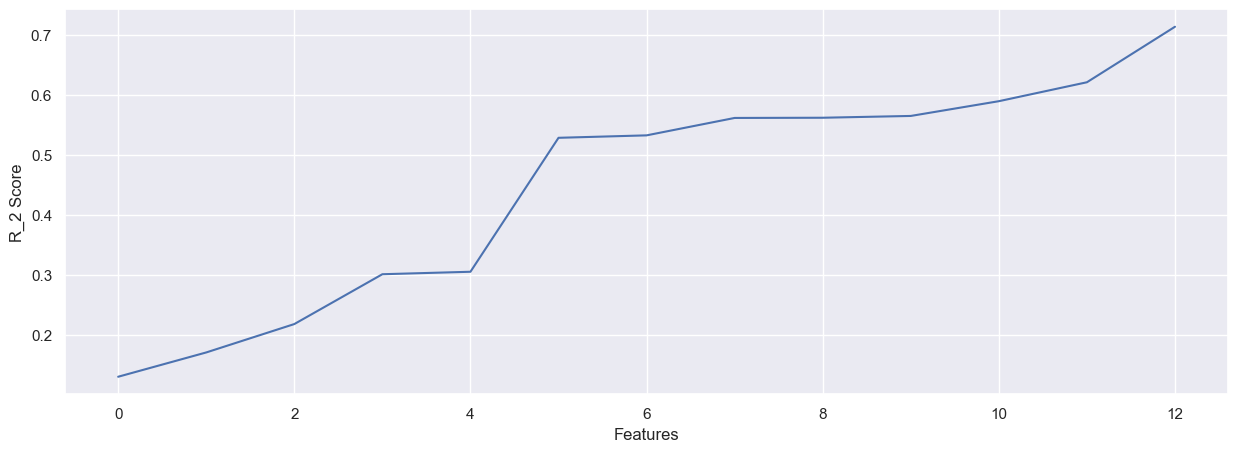

In [32]:
plt.figure(figsize=(15,5))
plt.plot(r_2);
plt.xlabel('Features')
plt.ylabel('R_2 Score')

through this plot, we can conclude that by increasing the features, the r-2 values are increasing as well
we can also see the importance of each feature against the r2 scores

### Adjusted R2 Calculation

In [33]:
import adj_helper as helper

#we can adjust r2 for the testing data

helper.adjR2(xtest, ytest, test_r2)

#now compare this data with previous test_r2 score

The adjusted R2 is: 0.6863569495436697


In [34]:
#we can also adjust r2 for the training data

helper.adjR2(xtrain, ytrain, train_r2)

#now compare this data with previous train_r2 score

The adjusted R2 is: 0.7337744173295739


**Ploting Residual Plots**

A residual is the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. <b>the error of the prediction</b>. The ResidualsPlot Visualizer shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

If the points are randomly dispersed around the horizontal axis, a linear regression model is usually well-suited for the data; otherwise, a non-linear model is more appropriate. The following example shows a fairly random, uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our linear model is performing well.

Yellowbrick's ResidualsPlot Visualizer also displays a histogram of the error values along the right-hand side. In the example above, the error is normally distributed around zero, which also generally indicates a well-fitted model. If the histogram is not desired, it can be turned off with the hist=False flag.

In [35]:
#!pip install yellowbrick

C:\Users\s.hamza1110\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\s.hamza1110\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\s.hamza1110\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\s.hamza1110\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\s.hamza1110\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted w

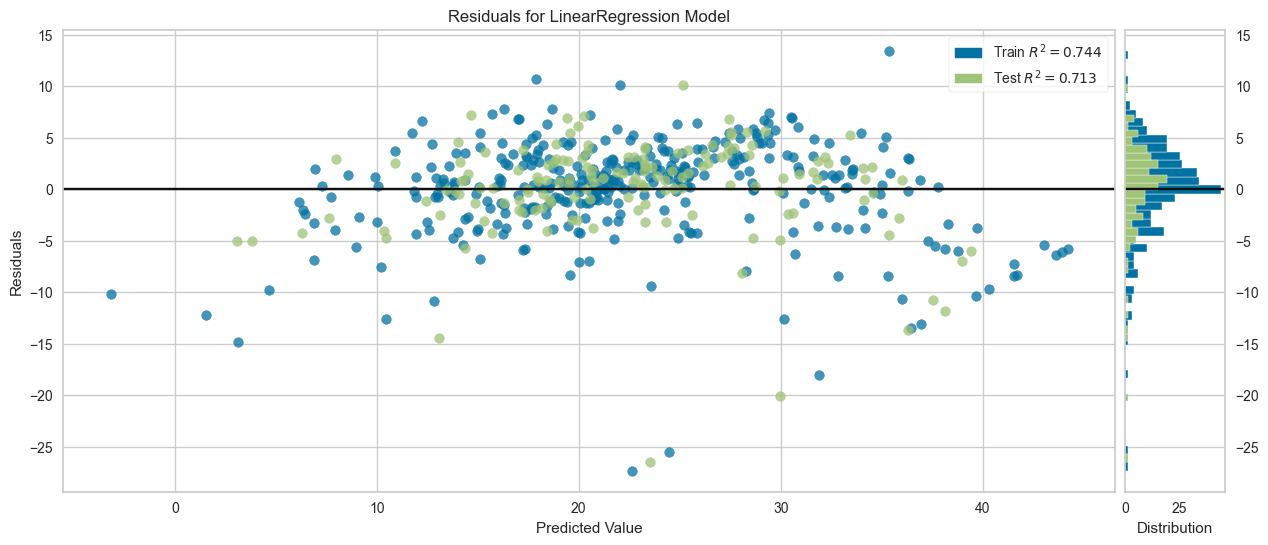

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [36]:
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15,6)) 

visualizer = ResidualsPlot(model, hist=True)  #plotting the trained model 

visualizer.fit(xtrain.values, ytrain.values)    #training residuals

visualizer.score(xtest.values, ytest.values)  #testing residuals
  
visualizer.poof()      #poof will draw line at the 0th residual value

## 3 Recursive Feature Elimination
The sklearn package has several feature selection methods and details can be found at the [documentation][feature link] site. In this example we'll be using the recursive feature elimination method. <b>This process starts with all variables and assigns weights to them. Those with small weights are first removed. The remaining variables are used to refit the model and the process repeats. 

We start by importing the packages that'll be used. 

[feature link]: http://scikit-learn.org/stable/modules/feature_selection.html

In [39]:
from sklearn.feature_selection import RFE

In [40]:
lrm = LinearRegression()

In [41]:
#print(Y)
print(Y.values)
print(np.hstack(Y.values))

[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25. ]
 [20.6]
 [28.4]
 [21.4]
 [38.7]
 [43.8]
 [33.2]
 [27.5]
 [26.5]
 [18.6]
 [19.3]
 [20.1]
 [19.5]
 [19.5]
 [20.4]
 [19.8]
 [19.4]
 [21.7]
 [22.8]
 [18.8]
 [18.7]
 [18.5]
 [18.3]
 [21.2]
 [19.2]
 [20.4]
 [19.3]
 [22. ]
 [20.3]
 [20.5]
 [17.3]
 [18.8]


In [44]:
# recursive feature elimination with cross validation, using r-squared as metric

rfe = RFE(estimator=lrm, step=3) #check three features at once to do recursive feature elimination algorithm

rfe.fit(X, np.hstack(Y.values)) #np.hstack will stack the Y.values in a horizontal form

RFE(estimator=LinearRegression(), step=3)

In [45]:
feature_name = np.array(columnss)  #

list(feature_name[rfe.support_])   #rfe.support_ gives you an array format , check below

['Crime Rate',
 'NO2 concentration',
 'Average Rooms/Dwelling.',
 'Distance to Employment Centres',
 'Teacher/town',
 'Lower Status Percent']

In [46]:
rfe.support_

array([ True, False, False, False,  True,  True, False,  True, False,
       False,  True, False,  True])

In [67]:
# print the optimal number of feature
print("Optimal number of features : ", rfe.n_features_)

# save the selected features
feature_cols_selected = list((feature_name)[rfe.support_])

print("Features selected: " + str(feature_cols_selected))

Optimal number of features :  6
Features selected: ['Crime Rate', 'NO2 concentration', 'Average Rooms/Dwelling.', 'Distance to Employment Centres', 'Teacher/town', 'Lower Status Percent']


Once the features to include are selected, we can use them to fit the model. While the scaled features were used in the RFE step above, we'll use the original values for fitting the model. This way we don't have to tranform the data when making predictions.

In [68]:
xtrain_new = xtrain[list(feature_name[rfe.support_])]
xtest_new = xtest[list(feature_name[rfe.support_])]

print(xtrain_new.shape)
print(xtest_new.shape)

(354, 6)
(152, 6)


In [69]:
print(ytrain.shape)
print(ytest.shape)

(354, 1)
(152, 1)


In [70]:
lm2 = LinearRegression()

lm2.fit(xtrain_new, ytrain)

LinearRegression()

In [71]:
pred_new = lm2.predict(xtest_new)

In [72]:
# print the R-squared
print("The R-squared value is: {0:0.4f} \n".format(r2_score(ytest, pred_new)))

The R-squared value is: 0.6804 



**Adjusted r2**

In [73]:
helper.adjR2(xtest_new,ytest,r2_score(ytest, pred_new))

The adjusted R2 is: 0.6671730504971618


### Cross Validation

<img src='https://raw.githubusercontent.com/ritchieng/machine-learning-dataschool/master/images/07_cross_validation_diagram.png' width=200, height=400 >

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
scores = cross_val_score(lm2, xtrain_new, ytrain, cv=15)

In [77]:
print(scores)

[0.79458983 0.77162627 0.71186405 0.77974864 0.70089343 0.7445824
 0.71288693 0.72019711 0.37222463 0.75239436 0.61350668 0.40021666
 0.77618284 0.81828902 0.4858166 ]


In [78]:
print(scores.mean())

0.6770012961451412


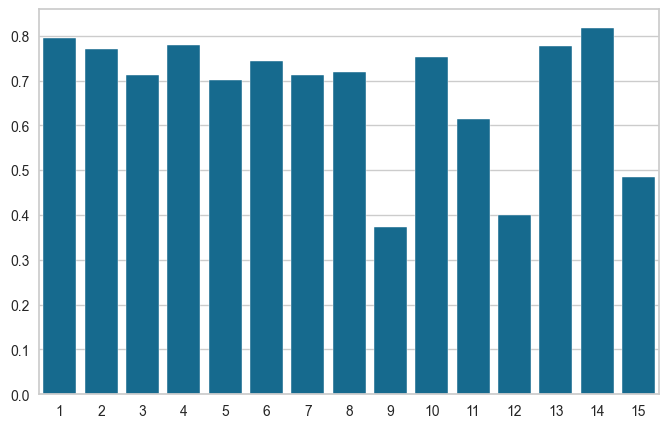

In [79]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(range(1,len(scores)+1)),y=scores, color='b')
plt.show()